<a href="https://colab.research.google.com/github/fareenamughal/Group-6-Crypto/blob/main/Machine%20learning/Machine_learning_Cardano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    

In [2]:
# Import yfinance
import yfinance as yf


In [3]:
# Cardano prediction

In [4]:
# Bringing data from yfinance to dataframe - Cardano
df = yf.download('ADA-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
# Bringing data into csv file
df.to_csv('cardano_data.csv', encoding='utf-8', index=True)

In [6]:
# Checking data in dataframe
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09 00:00:00+00:00,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
2017-11-10 00:00:00+00:00,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2017-11-11 00:00:00+00:00,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
2017-11-12 00:00:00+00:00,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
2017-11-13 00:00:00+00:00,0.024364,0.026300,0.023495,0.025808,0.025808,4419440


In [7]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

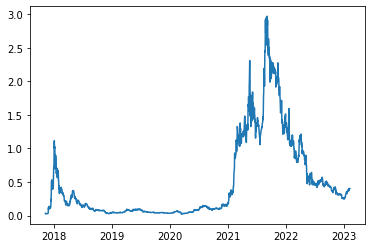

In [8]:
# Checking data via plot function
plt.plot(df.index, df['Adj Close'])
plt.show()

In [9]:
# length of dataframe
len(df)

1914

In [10]:
# Variable to hold 80% of the dataset
to_row = int(len(df)*0.8)

In [11]:
# Training the model
train = list(df[0:to_row]['Adj Close'])
train

[0.03205300122499466,
 0.027118999511003494,
 0.02743699960410595,
 0.023977000266313553,
 0.025807999074459076,
 0.02622999995946884,
 0.026444999501109123,
 0.027580000460147858,
 0.025772999972105026,
 0.0263689998537302,
 0.028084000572562218,
 0.02958099916577339,
 0.02833000011742115,
 0.02854900062084198,
 0.02744399942457676,
 0.02838199958205223,
 0.03044700063765049,
 0.03633200004696846,
 0.050592999905347824,
 0.11974400281906128,
 0.08971799910068512,
 0.11988300085067749,
 0.1313520073890686,
 0.13235099613666534,
 0.13180699944496155,
 0.13586999475955963,
 0.12748800218105316,
 0.11783900111913681,
 0.10550100356340408,
 0.11546500027179718,
 0.11960899829864502,
 0.11028099805116653,
 0.12138299643993378,
 0.1338910013437271,
 0.1342809945344925,
 0.24075299501419067,
 0.21346700191497803,
 0.4046649932861328,
 0.5130109786987305,
 0.5181980133056641,
 0.5312730073928833,
 0.4861510097980499,
 0.477851003408432,
 0.407150000333786,
 0.41402700543403625,
 0.390029013156

In [12]:
# Testing the model
test = list(df[to_row:]['Adj Close'])
test

[1.4655410051345825,
 1.34175705909729,
 1.2580549716949463,
 1.1232329607009888,
 1.066715955734253,
 1.122370958328247,
 1.0665980577468872,
 1.0435739755630493,
 1.0790469646453857,
 1.0435329675674438,
 1.0506060123443604,
 1.0595699548721313,
 1.0374729633331299,
 1.0523029565811157,
 1.0886240005493164,
 1.028905987739563,
 1.0564440488815308,
 1.1356240510940552,
 1.1273449659347534,
 1.1445469856262207,
 1.1973069906234741,
 1.1787199974060059,
 1.1948100328445435,
 1.1524779796600342,
 1.080346941947937,
 1.0581990480422974,
 1.0458190441131592,
 1.050266981124878,
 1.1075860261917114,
 1.0849809646606445,
 1.0198949575424194,
 0.9971129894256592,
 0.9977030158042908,
 0.9329019784927368,
 0.8582360148429871,
 0.8890169858932495,
 0.8691689968109131,
 0.8534250259399414,
 0.8980270028114319,
 0.8879179954528809,
 0.858335018157959,
 0.9598280191421509,
 0.9623460173606873,
 0.9386619925498962,
 0.902658998966217,
 0.8428890109062195,
 0.8656719923019409,
 0.8237519860267639,
 

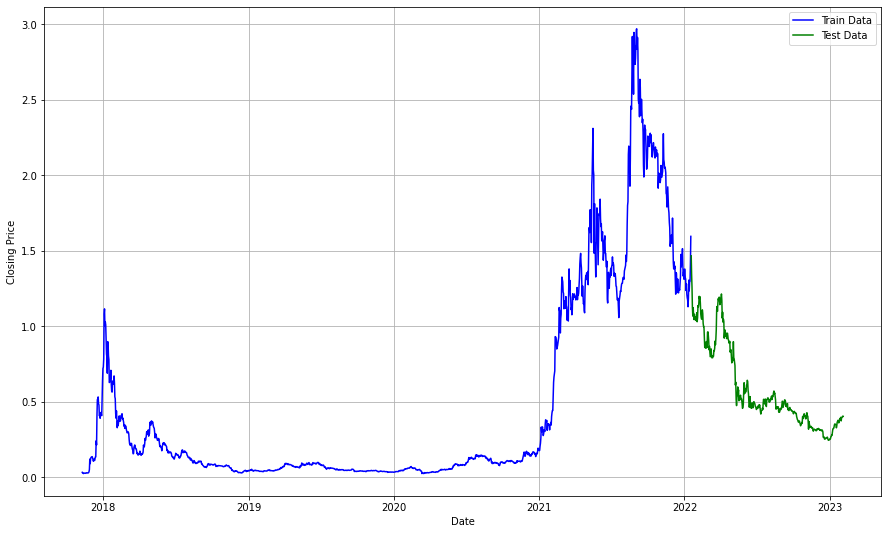

In [13]:
# Plotting train/ test data
plt.figure(figsize =(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel ('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'blue', label ='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'green', label ='Test Data')
plt.legend()

In [14]:
# ARIMA model 
model_predictions = []
test_obs = len(test)


In [15]:
# Future prediction
for i in range(test_obs):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  # print('Prediction' ,yhat)

Y Hat - The estimated or predicted values in a regression or other predictive model are termed the y-hat values. "Y" because y is the outcome or dependent variable in the model equation, and a "hat" symbol (circumflex) placed over the variable name is the statistical designation of an estimated value.

In [16]:
# ARIMA model summary
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1912
Model:                 ARIMA(4, 1, 0)   Log Likelihood                3093.410
Method:                       css-mle   S.D. of innovations              0.048
Date:                Sat, 04 Feb 2023   AIC                          -6174.821
Time:                        16:17:17   BIC                          -6141.485
Sample:                             1   HQIC                         -6162.553
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.191      0.849      -0.002       0.002
ar.L1.D.y     -0.0665      0.023     -2.912      0.004      -0.111      -0.022
ar.L2.D.y      0.0162      0.023      0.711      0.4

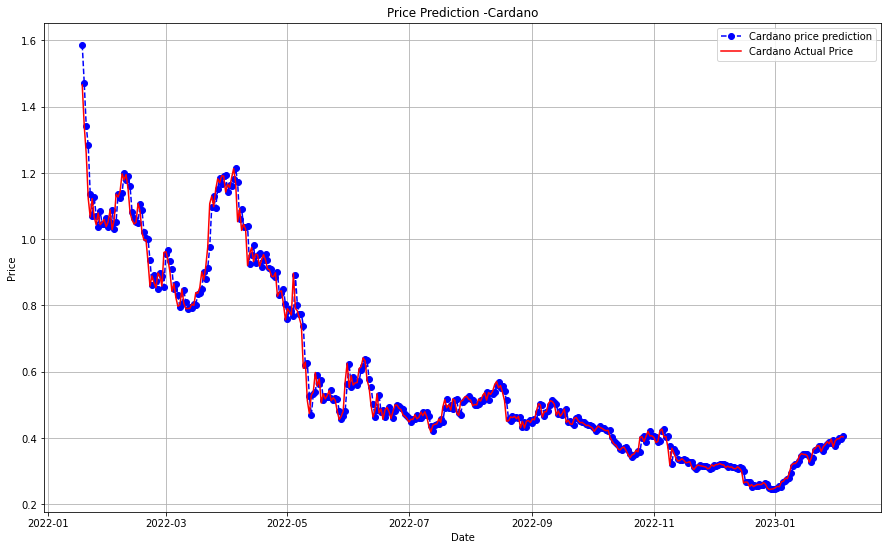

In [17]:
# Data visualization
plt.figure(figsize=(15,9))
plt.grid(True)
start_date = df[to_row:].index
plt.plot(start_date, model_predictions, color = 'blue', marker ='o', linestyle ='dashed', label ='Cardano price prediction')
plt.plot(start_date, test, color ='red', label ='Cardano Actual Price')
plt.title('Price Prediction -Cardano')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions) -np.array(test))/np.abs(test))
# Checking Mean Absolute Percentage Error
print('MAPE:' +str(mape))

MAPE:0.03400222887294426


MAPE of 3.4% implies the model is 96.6% accurate in predicting the test obeservations

In [19]:
# Checking Root Mean Square Error
from math import sqrt
test = df[to_row:]['Adj Close']
print('Mean of test:',test.mean())
rmse = sqrt(mean_squared_error(test, model_predictions,))
print('Mean Squared Error:', rmse)

Mean of test: 0.5861935848589043
Mean Squared Error: 0.03298907984470384


In [20]:
# Prediction for next 5 days
prediction_next_5_days = []
for i in range(5):
  model = ARIMA(train, order =(4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  prediction_next_5_days.append(yhat)
  start_test_value = test[i]
  train.append(start_test_value)
  print('Prediction' ,yhat)

Prediction 0.40368127899833234
Prediction 1.3950621151295097
Prediction 1.370479186753205
Prediction 1.2021383850406766
Prediction 1.1817461094478305


In [21]:
# Converting list to dataframe 
Prediction = pd.DataFrame(prediction_next_5_days)

In [22]:
#Reviewing dataframe
Prediction

,0
0,0.403681
1,1.395062
2,1.370479
3,1.202138
4,1.181746


In [23]:
#Converting dataframe to csv for visualization
Prediction.to_csv('Cardano_prediction.csv', header='Prediction', index=True)